In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
#current_date = <>
#session.query.filterby(current_date - "1 year").all()

[]

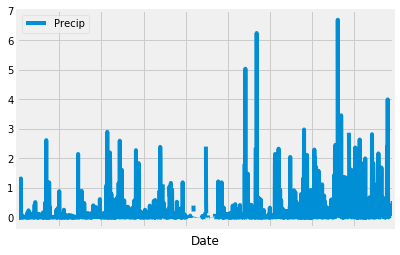

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
current_date = dt.date(2017,8,23)
prior_date = dt.date(2016,8,23)

measurement_list = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prior_date).all()

# for place in measurement_list:
#     print(place.station)
#     print(place.date)
#     print(place.prcp)
# Calculate the date 1 year ago from the last data point in the database


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column
unfiltered_df = pd.DataFrame(measurement_list, columns=['Date', 'Precip'])


#abc_df = pd.DataFrame(unfiltered_df["Precip"], index=unfiltered_df["Date"])

# abc_df
abc_df = unfiltered_df.set_index(unfiltered_df['Date'])

abc_df = abc_df.drop(columns=['Date'])
abc_df.head()
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
ax = abc_df.plot()
ax.set_xticklabels("")

![precipitation](Images/precipitation.png)

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
abc_df.describe()

,Precip
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [13]:
# Design a query to show how many stations are available in this dataset?
station_list = session.query(func.count(Station.station)).all()
station_list

[(9)]

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_active = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()
station_active

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [15]:
unfiltered_df3 = pd.DataFrame(station_active, columns=['Station ID', 'Name', 'Latitude', 'Longitude', 'Elevation'])
unfiltered_df3

,Station ID,Name,Latitude,Longitude,Elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [16]:
tyu = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()
tyu

[('USC00519397', '2010-01-01', 0.08, 65.0),
 ('USC00519397', '2010-01-02', 0.0, 63.0),
 ('USC00519397', '2010-01-03', 0.0, 74.0),
 ('USC00519397', '2010-01-04', 0.0, 76.0),
 ('USC00519397', '2010-01-06', None, 73.0),
 ('USC00519397', '2010-01-07', 0.06, 70.0),
 ('USC00519397', '2010-01-08', 0.0, 64.0),
 ('USC00519397', '2010-01-09', 0.0, 68.0),
 ('USC00519397', '2010-01-10', 0.0, 73.0),
 ('USC00519397', '2010-01-11', 0.01, 64.0),
 ('USC00519397', '2010-01-12', 0.0, 61.0),
 ('USC00519397', '2010-01-14', 0.0, 66.0),
 ('USC00519397', '2010-01-15', 0.0, 65.0),
 ('USC00519397', '2010-01-16', 0.0, 68.0),
 ('USC00519397', '2010-01-17', 0.0, 64.0),
 ('USC00519397', '2010-01-18', 0.0, 72.0),
 ('USC00519397', '2010-01-19', 0.0, 66.0),
 ('USC00519397', '2010-01-20', 0.0, 66.0),
 ('USC00519397', '2010-01-21', 0.0, 69.0),
 ('USC00519397', '2010-01-22', 0.0, 67.0),
 ('USC00519397', '2010-01-23', 0.0, 67.0),
 ('USC00519397', '2010-01-24', 0.01, 71.0),
 ('USC00519397', '2010-01-25', 0.0, 67.0),
 ('USC

In [17]:
unfiltered_df2 = pd.DataFrame(tyu, columns=['Station ID', 'Date', 'Prcp', 'Tobs'])
unfiltered_df2


,Station ID,Date,Prcp,Tobs
0,USC00519397,2010-01-01,0.08,65.0
1,USC00519397,2010-01-02,0.00,63.0
2,USC00519397,2010-01-03,0.00,74.0
3,USC00519397,2010-01-04,0.00,76.0
4,USC00519397,2010-01-06,NaN,73.0
5,USC00519397,2010-01-07,0.06,70.0
6,USC00519397,2010-01-08,0.00,64.0
7,USC00519397,2010-01-09,0.00,68.0
8,USC00519397,2010-01-10,0.00,73.0
9,USC00519397,2010-01-11,0.01,64.0


In [18]:
combined_df = pd.merge(unfiltered_df3, unfiltered_df2, on='Station ID')
ert = combined_df.groupby(by='Station ID')
ert.head()
actor = {"Station ID": ert['Station ID']}
print(actor)
#ert.apply(pd.Series.value_counts)
#combined_df.sort_values(by='Tobs')
#ert.valuecounts()
#df5 = ert.groupby('Station ID')['ID'].nunique()

{'Station ID': <pandas.core.groupby.generic.SeriesGroupBy object at 0x00000258DB9A08D0>}


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
